In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import geopandas as gpd

In [2]:
# set the filepath
fp = "shape_files\\India_Districts_2020\\India_Districts.shp"
#read the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is a GEOdataframe
map_df.head()

,dtname,stname,stcode11,dtcode11,year_stat,Dist_LGD,State_LGD,JID,geometry
0,Kupwara,JAMMU & KASHMIR,01,001,2011_c,8.0,1.0,598,"POLYGON ((74.33744 34.78209, 74.34695 34.78019..."
1,Bandipore,JAMMU & KASHMIR,01,009,2011_c,623.0,1.0,599,"POLYGON ((74.73338 34.67121, 74.74956 34.66883..."
2,Baramula,JAMMU & KASHMIR,01,008,2011_c,3.0,1.0,600,"POLYGON ((74.51946 34.42533, 74.52090 34.42237..."
3,Ganderbal,JAMMU & KASHMIR,01,011,2011_c,626.0,1.0,601,"POLYGON ((74.94144 34.46384, 74.94554 34.46247..."
4,Anantnag,JAMMU & KASHMIR,01,014,2011_c,1.0,1.0,602,"POLYGON ((75.26949 34.25584, 75.27242 34.25356..."


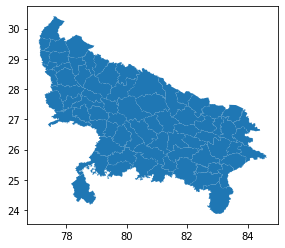

In [3]:
#Isolate the UP districts
map_df_up = map_df[map_df['stname'] == 'UTTAR PRADESH']

#Check the resulting UP Plot
map_df_up.plot()

# Generating a Standalone Choropleth Map

In [4]:
#Get the data CSV file
df = pd.read_csv('data\\UP_dummy_data.csv')
df.head()

,Tractor Model,Installed On,installation_state,installation_district
0,MAHINDRA ARJUN Ultra 605 DI-57HP,2019-10-12T12:49:38.554Z,Uttar Pradesh,Aligarh
1,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14T09:15:07.407Z,Uttar Pradesh,Aligarh
2,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14T11:24:34.931Z,Uttar Pradesh,Aligarh
3,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-11-26T06:20:57.740Z,Uttar Pradesh,Aligarh
4,MAHINDRA ARJUN Ultra 1 555 DI-50 HP,2020-01-09T09:40:19.475Z,Uttar Pradesh,Aligarh


In [5]:
#Get district wise installation count
df_district = df['installation_district'].value_counts().to_frame()
df_district.reset_index(inplace=True)
df_district.columns = ['district','count']
df_district.head()

,district,count
0,Meerut,28
1,Azamgarh,27
2,Lakhimpur Kheri,17
3,Kanpur,15
4,Sonbhadra,15


In [6]:
#Merge the districts df with the geopandas df
merged = map_df_up.set_index('dtname').join(df_district.set_index('district'))
merged.head()

,stname,stcode11,dtcode11,year_stat,Dist_LGD,State_LGD,JID,geometry,count
dtname,,,,,,,,,
Amroha,UTTAR PRADESH,09,137,2011_c,154.0,9.0,194,"POLYGON ((78.07308 29.08236, 78.07308 29.08236...",NaN
Hapur,UTTAR PRADESH,09,705,update2014,661.0,9.0,198,"POLYGON ((78.04630 28.88387, 78.04740 28.88388...",NaN
Bareilly,UTTAR PRADESH,09,150,2011_c,130.0,9.0,201,"POLYGON ((79.41858 28.90119, 79.41971 28.90089...",5.0
Pilibhit,UTTAR PRADESH,09,151,2011_c,173.0,9.0,202,"POLYGON ((79.81967 28.88726, 79.82096 28.88680...",4.0
Bulandshahr,UTTAR PRADESH,09,142,2011_c,134.0,9.0,205,"POLYGON ((77.96301 28.71528, 77.96318 28.71511...",NaN


In [7]:
#Fill NA values
merged['count'].fillna(0,inplace=True)
#Get max count
max_installs = merged['count'].max()

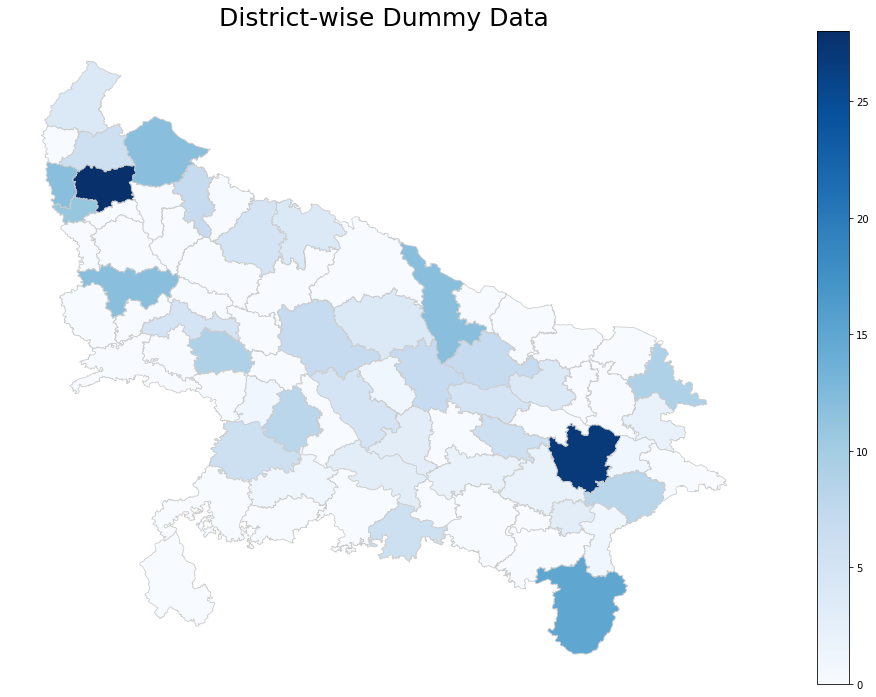

In [8]:
#Generate the choropleth map
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
# add a title
ax.set_title('District-wise Dummy Data', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max_installs))
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Generating a number of choropleth maps to stitch to form a video

In [9]:
#We've seen how to generate a standalone choropleth map using geopandas
#Now we'll attempt to generate a number of such maps and stitch them together
#to form an animated video
df['Installed On'] = df['Installed On'].apply(lambda x: x.split('T')[0])
df['Installed On'] = pd.to_datetime(df['Installed On'],format="%Y-%m-%d")
df.head()

,Tractor Model,Installed On,installation_state,installation_district
0,MAHINDRA ARJUN Ultra 605 DI-57HP,2019-10-12,Uttar Pradesh,Aligarh
1,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14,Uttar Pradesh,Aligarh
2,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14,Uttar Pradesh,Aligarh
3,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-11-26,Uttar Pradesh,Aligarh
4,MAHINDRA ARJUN Ultra 1 555 DI-50 HP,2020-01-09,Uttar Pradesh,Aligarh


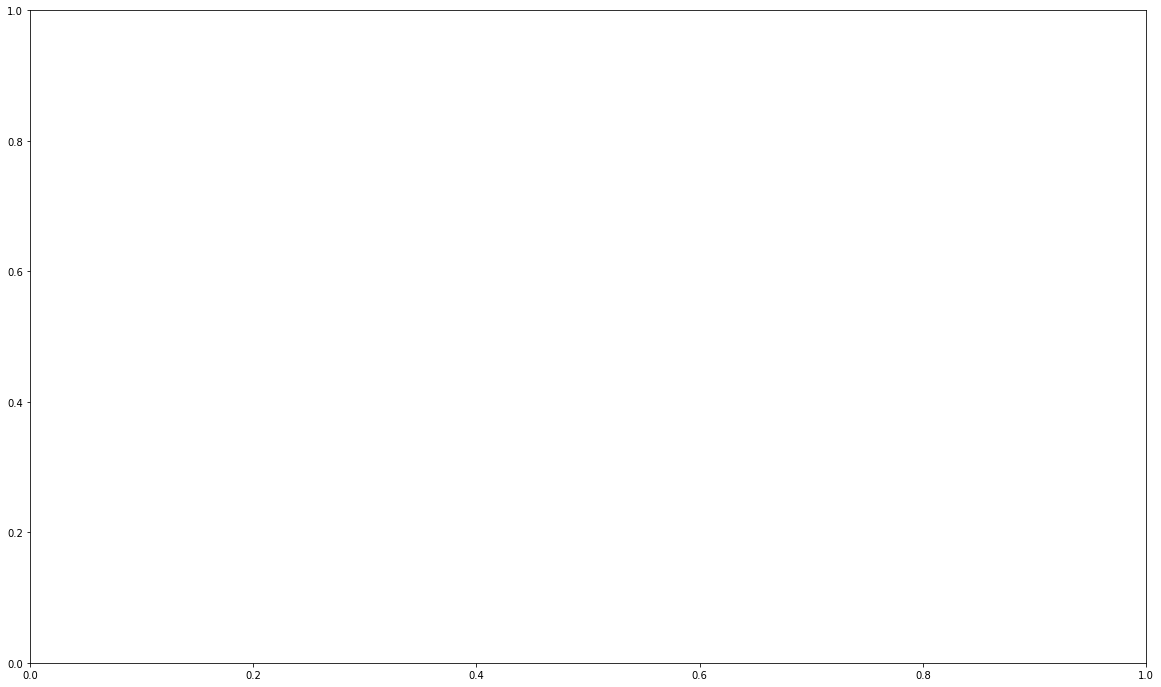

In [10]:
date_min = df['Installed On'].min()
n_days = df['Installed On'].nunique()

fig, ax = plt.subplots(1, figsize=(20, 12))

for i in range(0,n_days):
    date = date_min+timedelta(days=i)
    
    #Get cumulative df till that date
    df_c = df[df['Installed On'] <= date]
    
    #Generate the temporary df
    df_t = df_c['installation_district'].value_counts().to_frame()
    df_t.reset_index(inplace=True)
    df_t.columns = ['dist','count']
    
    #Get the merged df
    df_m = map_df_up.set_index('dtname').join(df_t.set_index('dist'))
    df_m['count'].fillna(0,inplace=True)
    fig, ax = plt.subplots(1, figsize=(20, 12))
    df_m.plot(column='count',
                cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    # remove the axis
    ax.axis('off')
    # add a title
    ax.set_title('District-wise Dummy Data', 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', 
            norm=plt.Normalize(vmin=0, vmax=df_t['count'].iloc[0]))
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)
    fontsize = 36
    
    # Positions for the date
    date_x = 82
    date_y = 29

    ax.text(date_x, date_y, 
            f"{date.strftime('%b %d, %Y')}", 
            color='black',
            fontsize=fontsize)
    fig.savefig(f"frames_gpd/frame_{i:03d}.png", 
                dpi=100, bbox_inches='tight')
    plt.close()

In [11]:
#Now that the frames have been created, they can be stitched together to form a video using the command prompt
#Open command promp and navigate to the frames_gpd folder
#The run the following command:
# >ffmpeg -framerate 5 -i frame_%3d.png -c:v h264 -r 30 -s 1920x1080 ./district_video.mp4

#To learn more about the different attributes of ffmpeg, see https://trac.ffmpeg.org/wiki/Slideshow